In [441]:
import torch
from matplotlib import pyplot as plt
from torch import Tensor

torch.set_printoptions(threshold=10, linewidth=128)  # for printing

In [442]:
MAX = 100
x = torch.linspace(0, 10, steps=MAX, dtype=float)
print(x.shape, x)

torch.Size([100]) tensor([ 0.0000,  0.1010,  0.2020,  ...,  9.7980,  9.8990, 10.0000], dtype=torch.float64)


In [443]:
y = 10 * x + torch.randint(-10, 10, (MAX,))
print(y.shape, y)

torch.Size([100]) tensor([-2.0000,  3.0101, -0.9798,  ..., 92.9798, 99.9899, 93.0000], dtype=torch.float64)


In [444]:
#plt.scatter(x, y)

In [445]:
w = torch.tensor(5., requires_grad=True)
print(w.shape, w)

b = torch.tensor(1., requires_grad=True)
print(b.shape, b)

torch.Size([]) tensor(5., requires_grad=True)
torch.Size([]) tensor(1., requires_grad=True)


$ y = wx + b $

In [446]:
def hypothesis(x) -> Tensor:
    return w * x + b

In [447]:
def cost_fn(input: Tensor, target: Tensor) -> Tensor:
    return torch.sum((target - input) ** 2) / len(target)

In [448]:
# def dcost_dw(y: Tensor, x: Tensor):   Use PyTorch autograd
# def dcost_db(y: Tensor, x: Tensor):   Use PyTorch autograd

   0 : cost = 757.8155218855219
  10 : cost = 210.11820553425812
  20 : cost = 77.59386254006394
  30 : cost = 45.49003994275797
  40 : cost = 37.67609068499151
  50 : cost = 35.73774603017504
  60 : cost = 35.2210434276754
  70 : cost = 35.04867687890012
  80 : cost = 34.96006595552245
  90 : cost = 34.89217620235726
 100 : cost = 34.82975741148992


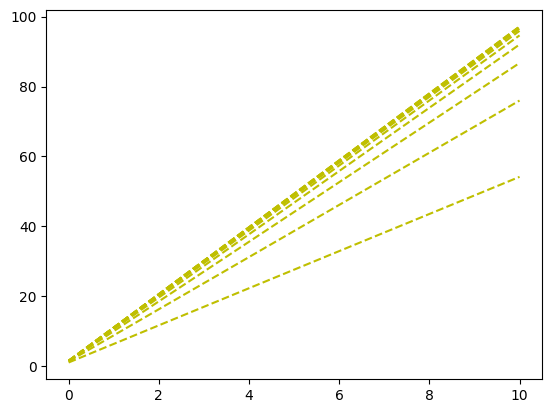

In [449]:
lr = 0.001
for e in range(101):
    y_pred = hypothesis(x)
    cost = cost_fn(y_pred, y)
    cost.backward()
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
        w.grad = None  # grad 초기화
        b.grad = None  # grad 초기화
    # plt.subplot(211)
    if not e % 10:
        print(f"{e:4} : cost = {cost}")
        plt.plot(x.tolist(), hypothesis(x).tolist(), '--y', label=f"epoch {e}")

In [450]:
# plt.subplot(211)
# plt.plot(x, y, 'oc')
# plt.plot(x, hypothesis(x), 'r')
# plt.xlabel('x axis')
# plt.ylabel('y axis')

In [451]:
# plt.subplot(212)
# plt.plot(costs)
# plt.xlabel('epoch')
# plt.ylabel('cost')